authors: lusanche csalceda

#  Part 1 

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

### 1. Create a matrix of random values of a distribution of your choice.

In [47]:
random_array = np.random.randint(0,10,size=(3,3))

print(random_array)

[[4 3 1]
 [3 9 1]
 [5 9 5]]


### 2. Create a 1-dimensional array of 12 sequential numbers and convert it to a 4x3 array.

In [48]:
before_array = np.array([0,1,2,3,4,5,6,7,8,9,10,11])

print(before_array)
print("\n")

after_array = before_array.reshape((4,3))

print(after_array)

[ 0  1  2  3  4  5  6  7  8  9 10 11]


[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]


### 3. Write a function that creates an incremental array of dimension (1,n) with values between 0 and 1. Use arr.shape to verify.

In [49]:
def create_incr_array(n):
    ret = np.linspace(0,1,n)
    return ret;

n = 3
incr_array = create_incr_array(n)

print(incr_array)
print(incr_array.shape)

[0.  0.5 1. ]
(3,)


### 4. Generate a 10x12 array and extract row 0-4 of columns 8-12.

In [50]:
hundred_twenty_array = np.arange(0,120,1)
ten_twelve_array = hundred_twenty_array.reshape((10,12))
extract_array = ten_twelve_array[0:5,7:12]

print(ten_twelve_array)
print("\n")
print(extract_array)

[[  0   1   2   3   4   5   6   7   8   9  10  11]
 [ 12  13  14  15  16  17  18  19  20  21  22  23]
 [ 24  25  26  27  28  29  30  31  32  33  34  35]
 [ 36  37  38  39  40  41  42  43  44  45  46  47]
 [ 48  49  50  51  52  53  54  55  56  57  58  59]
 [ 60  61  62  63  64  65  66  67  68  69  70  71]
 [ 72  73  74  75  76  77  78  79  80  81  82  83]
 [ 84  85  86  87  88  89  90  91  92  93  94  95]
 [ 96  97  98  99 100 101 102 103 104 105 106 107]
 [108 109 110 111 112 113 114 115 116 117 118 119]]


[[ 7  8  9 10 11]
 [19 20 21 22 23]
 [31 32 33 34 35]
 [43 44 45 46 47]
 [55 56 57 58 59]]


### 5. Using the function in Q3, get m vectors and bind them together (to have a m x n) matrix. Plot the matrix with matplotlib’s imshow.

[[0.00000000e+00 9.13242009e-04 1.82648402e-03 ... 9.98173516e-01
  9.99086758e-01 1.00000000e+00]
 [0.00000000e+00 9.13242009e-04 1.82648402e-03 ... 9.98173516e-01
  9.99086758e-01 1.00000000e+00]
 [0.00000000e+00 9.13242009e-04 1.82648402e-03 ... 9.98173516e-01
  9.99086758e-01 1.00000000e+00]
 ...
 [0.00000000e+00 9.13242009e-04 1.82648402e-03 ... 9.98173516e-01
  9.99086758e-01 1.00000000e+00]
 [0.00000000e+00 9.13242009e-04 1.82648402e-03 ... 9.98173516e-01
  9.99086758e-01 1.00000000e+00]
 [0.00000000e+00 9.13242009e-04 1.82648402e-03 ... 9.98173516e-01
  9.99086758e-01 1.00000000e+00]]


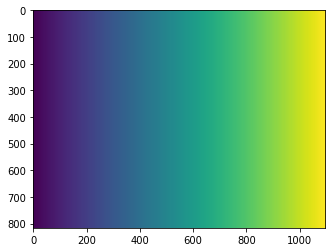

In [51]:


m = 816
n = 1096

vector_1 = create_incr_array(n)
t = m
m -= 1
while m:
    vector_2 = create_incr_array(n)
    vector_1 = np.vstack([vector_1,vector_2])
    m -= 1
m = t

vector_bind = vector_1
print(vector_bind)
plt.imshow(vector_bind)

### 6. Multiply the resulting matrix from Q5 with the matrix of a picture of your choice. Plot the resulting matrix.

(816, 1096, 4)


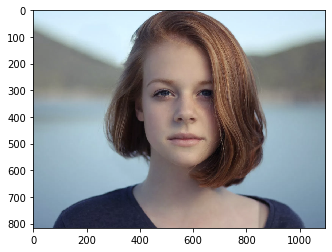

In [52]:
picture_1 = mpimg.imread('portrait.png')
plt.imshow(picture_1)

print(picture_1.shape)

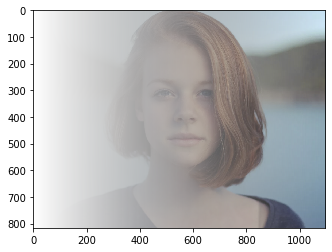

In [53]:
picture_1_copy = picture_1

i = 0
while i < 4:
    picture_1_copy[:,:,i] *= vector_bind
    i += 1

plt.imshow(picture_1_copy)

# Part 2 

### Control Function

In [55]:
def channel_control(channel, values):
    orig_size = channel.shape
    flat_channel = channel.flatten()
    adjusted = np.interp(flat_channel, np.linspace(0, 1, len(values)), values)
    return adjusted.reshape(orig_size)

### Kelvin

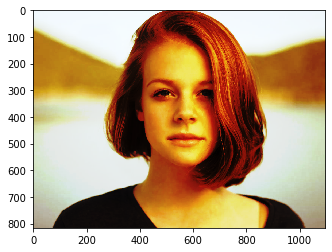

In [56]:
original_image = mpimg.imread('portrait.png')
r = original_image[:,:,0]
g = original_image[:,:,1]
b = original_image[:,:,2]
r_control = channel_control(r, [0,.5,0.7,1.0])
g_control = channel_control(g, [0,1.0])
b_control = channel_control(b, [0,.3,1.0])
merged = np.stack([r_control, g_control, b_control], axis=2)
merged = channel_control(merged, [0,.1,.9,1.0])
plt.imshow(merged)

### Hudson

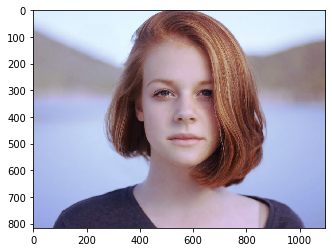

In [57]:
original_image = mpimg.imread('portrait.png')
r = original_image[:,:,0]
g = original_image[:,:,1]
b = original_image[:,:,2]
r_control = channel_control(r, [0,0.5,0.75,1.0])
g_control = channel_control(g, [0,0.6,1.0])
b_control = channel_control(b, [0,0.4,0.9,1.0])
merged = np.stack([r_control, g_control, b_control], axis=2)
merged = channel_control(merged, [0,1.0])
plt.imshow(merged)

### Lo-fi

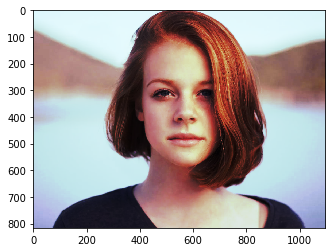

In [58]:
original_image = mpimg.imread('portrait.png')
r = original_image[:,:,0]
g = original_image[:,:,1]
b = original_image[:,:,2]
r_control = channel_control(r, [0,0.58,.7])
g_control = channel_control(g, [0,.98])
b_control = channel_control(b, [0,.98])
merged = np.stack([r_control, g_control, b_control], axis=2)
merged = channel_control(merged, [0,.2,.9,1.0])
plt.imshow(merged)

### Earlybird

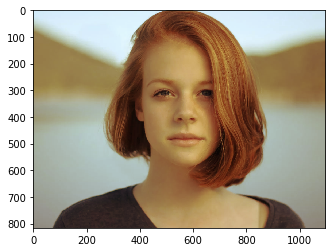

In [59]:
original_image = mpimg.imread('portrait.png')
r = original_image[:,:,0]
g = original_image[:,:,1]
b = original_image[:,:,2]
r_control = channel_control(r, [0,.5,0.7,1.0])
g_control = channel_control(g, [0,1.0])
b_control = channel_control(b, [0,.3,1.0])
merged = np.stack([r_control, g_control, b_control], axis=2)
merged = channel_control(merged, [0,1.0])
plt.imshow(merged)

# Bonus

### 1977

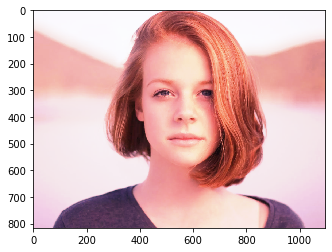

In [60]:
original_image = mpimg.imread('portrait.png')
r = original_image[:,:,0]
g = original_image[:,:,1]
b = original_image[:,:,2]
r_control = channel_control(r, [0,.85,1.])
g_control = channel_control(g, [0,1.])
b_control = channel_control(b, [0,1.])
merged = np.stack([r_control, g_control, b_control], axis=2)
merged = channel_control(merged, [0,.5,.9,1.0])
plt.imshow(merged)

### Gotham

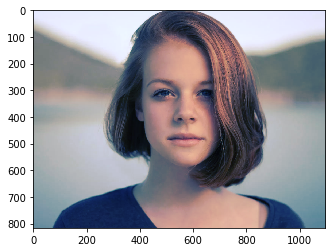

In [61]:
original_image = mpimg.imread('portrait.png')
r = original_image[:,:,0]
b = original_image[:,:,2]
r_boost_lower = channel_control(r, [0,0.05,0.1,0.2,0.3,0.5, 0.7, 0.8, 0.9,0.95, 1.0])
b_more = np.clip(b+0.03,0,1.0)
merged = np.stack([r_boost_lower, original_image[:,:,1], b_more], axis=2)
b = merged[:, :, 2]
b_adjusted = channel_control(b,[0,0.047,0.118,0.251,0.318,0.392,0.42,0.439,0.475,0.561, 0.58, 0.627, 0.671,0.733,0.847,0.925,1])
merged[:, :, 2] = b_adjusted
plt.imshow(merged)